### Stack

In [81]:
stack = []
print(stack)

stack.append(1)
stack.append(2)
stack.append(3)
stack.append(4)
stack.append(5)
print(stack)

stack.pop()
stack.pop()
print(stack)

[]
[1, 2, 3, 4, 5]
[1, 2, 3]


### Queue

In [82]:
from collections import deque

queue = deque(maxlen=4)
print(queue)

queue.append(1)
queue.append(2)
queue.append(3)
queue.append(4)
queue.append(5)
print(queue)

queue.pop()
queue.pop()
print(queue)

deque([], maxlen=4)
deque([2, 3, 4, 5], maxlen=4)
deque([2, 3], maxlen=4)


In [83]:
def factorial(n):
    if n <= 1:
        return 1
    return n * factorial(n-1)

factorial(10)

3628800

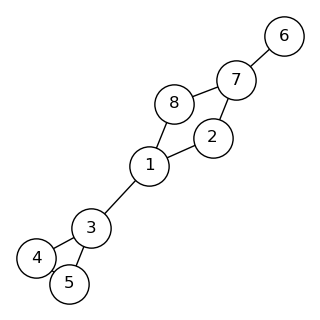

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    1: [2,3,8],
    2: [1,7],
    3: [1,4,5],
    4: [3,5],
    5: [3,4],
    6: [7],
    7: [2,6,8],
    8: [1,7]
}

G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

plt.figure(figsize=(3,3))
nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_size=800,
        node_color='w',
        edgecolors='k')
plt.show()

In [112]:
graph = {
    1: [2,3,8],
    2: [1,7],
    3: [1,4,5],
    4: [3,5],
    5: [3,4],
    6: [7],
    7: [2,6,8],
    8: [1,7]
}

# DFS

frontiers = [1]
visited = []

while frontiers:
    current = frontiers.pop()
    if current not in visited:
        visited.append(current)
        frontiers.extend(neighbor for neighbor in sorted(graph[current], reverse=True) if neighbor not in visited)

visited

[1, 2, 7, 6, 8, 3, 4, 5]

frontiers는 중복된 값을 갖을 수 있다. '8'의 경우 1 또는 7의 neighbor로 frontiers에 중복되어 추가된다. 다만 스택구조로 LIFO가 작용되고 7의 neighbor로 인식됨. 이후 8 as a neighbor of 1은 if문을 통해 visited조건을 만족하여 걸러짐.

In [113]:
# BFS

frontiers = [1]
visited = []

while frontiers:
    current = frontiers.pop(0)
    if current not in visited:
        visited.append(current)
        frontiers.extend(neighbor for neighbor in sorted(graph[current]) if neighbor not in visited)

visited

[1, 2, 3, 8, 7, 4, 5, 6]

In [125]:
graph = {
    1: [2,3,8],
    2: [1,7],
    3: [1,4,5],
    4: [3,5],
    5: [3,4],
    6: [7],
    7: [2,6,8],
    8: [1,7]
}

def DFS(current, visited=[]):
    visited.append(current)
    for neighbor in sorted(graph[current]):
        if neighbor not in visited:
            visited = DFS(neighbor, visited)
    return visited

DFS(1)

[1, 2, 7, 6, 8, 3, 4, 5]

In [ ]:
graph = {
    1: [2,3,8],
    2: [1,7],
    3: [1,4,5],
    4: [3,5],
    5: [3,4],
    6: [7],
    7: [2,6,8],
    8: [1,7]
}

def BFS(current, visited=[]):
    visited.append(current)
    for neighbor in sorted(graph[current]):
        if neighbor not in visited:
            visited = DFS(neighbor, visited)
    return visited

DFS(1)